# IDA_ML_Project_ss21


# Name: Dinesh Kumar Matriculation No: 810183


In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,roc_curve,plot_roc_curve, confusion_matrix, plot_roc_curve, auc, plot_precision_recall_curve
from cycler import cycler

In [61]:
#Reading data from File into data frame 
df = pd.read_csv('kredit.dat', sep="\t",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [62]:
# Naming columns in data frame
df.columns = ['status','duration','creditHist','purpose','creditAmount','savingsAccount',
 'employmentSince','installRate','personalStatusSex','guarantors',
 'residenceSince','property','age','otherPlans','housing',
 'existingCredits','job','liablePeople','telephone','foreignWorker',
 'creditworthy']

df.head()

,status,duration,creditHist,purpose,creditAmount,savingsAccount,employmentSince,installRate,personalStatusSex,guarantors,...,property,age,otherPlans,housing,existingCredits,job,liablePeople,telephone,foreignWorker,creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [63]:
#Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   status             1000 non-null   object
 1   duration           1000 non-null   int64 
 2   creditHist         1000 non-null   object
 3   purpose            1000 non-null   object
 4   creditAmount       1000 non-null   int64 
 5   savingsAccount     1000 non-null   object
 6   employmentSince    1000 non-null   object
 7   installRate        1000 non-null   int64 
 8   personalStatusSex  1000 non-null   object
 9   guarantors         1000 non-null   object
 10  residenceSince     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  otherPlans         1000 non-null   object
 14  housing            1000 non-null   object
 15  existingCredits    1000 non-null   int64 
 16  job                1000 non-null   object
 

In [5]:
# Data Cleansing
#Replacing Missing Values with NaN
df.replace('?', np.nan, inplace = True)
df.head()

,status,duration,creditHist,purpose,creditAmount,savingsAccount,employmentSince,installRate,personalStatusSex,guarantors,...,property,age,otherPlans,housing,existingCredits,job,liablePeople,telephone,foreignWorker,creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [6]:
# Counting NaN values
missing_values = df.isna()
missing_values.sum()

status                 0
duration               0
creditHist             0
purpose              173
creditAmount           0
savingsAccount         0
employmentSince      496
installRate            0
personalStatusSex      0
guarantors             0
residenceSince         0
property               0
age                    0
otherPlans             0
housing                0
existingCredits        0
job                  232
liablePeople           0
telephone              0
foreignWorker        360
creditworthy           0
dtype: int64

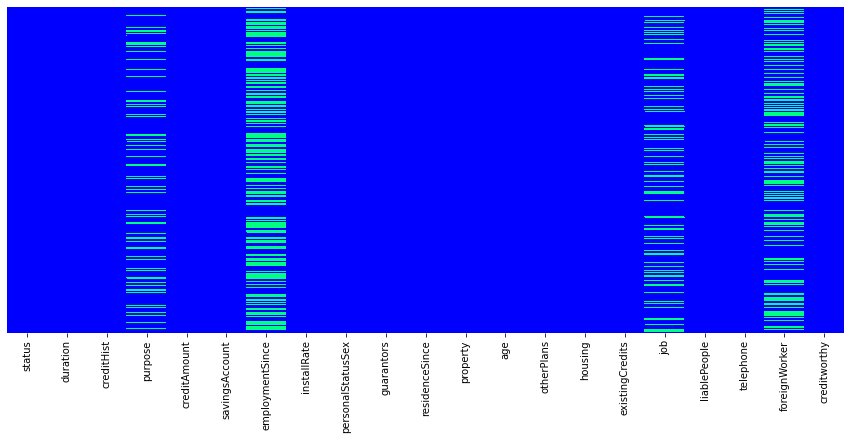

In [7]:
#Visualizing NaN values using Heat Map
plt.figure(figsize = (15,6))
sns.heatmap(missing_values, yticklabels = False, cbar = False, cmap="winter")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A776A263D0>,
      dtype=object)

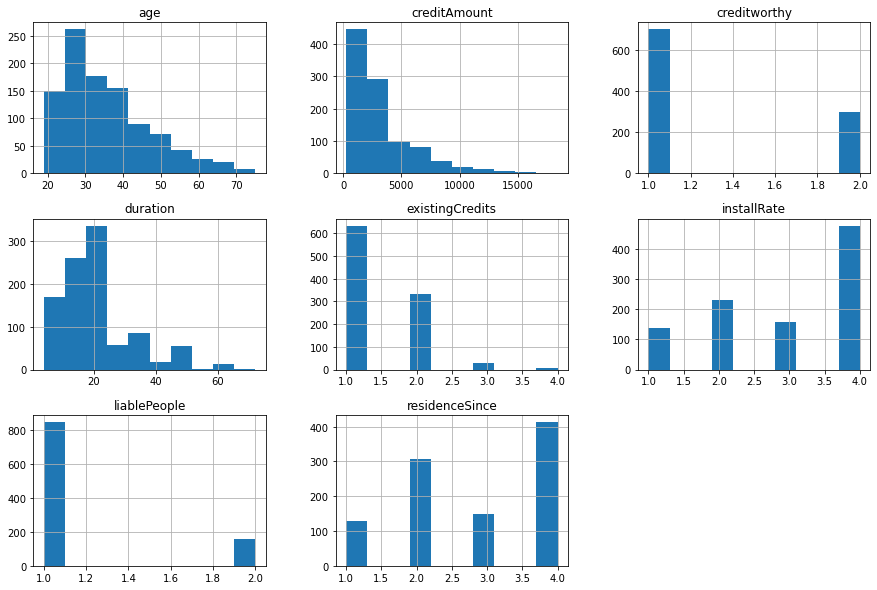

In [8]:
# Visualizing Count of all numeric columns
df.hist(figsize = (15,10))

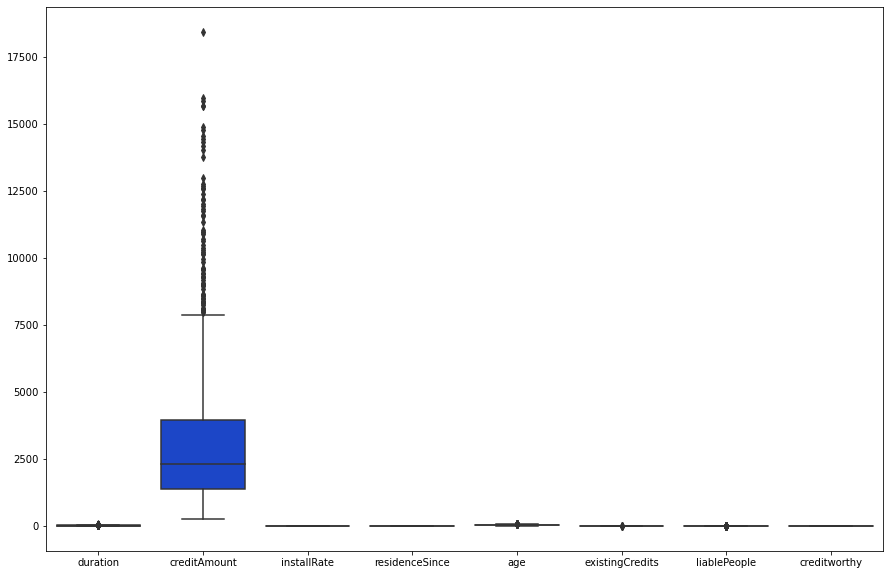

In [9]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, palette = 'winter')

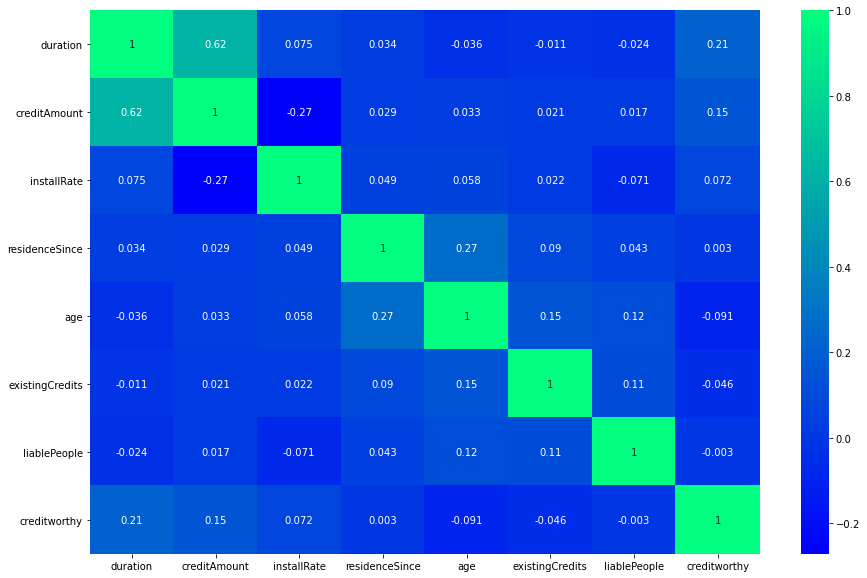

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True,cmap="winter")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


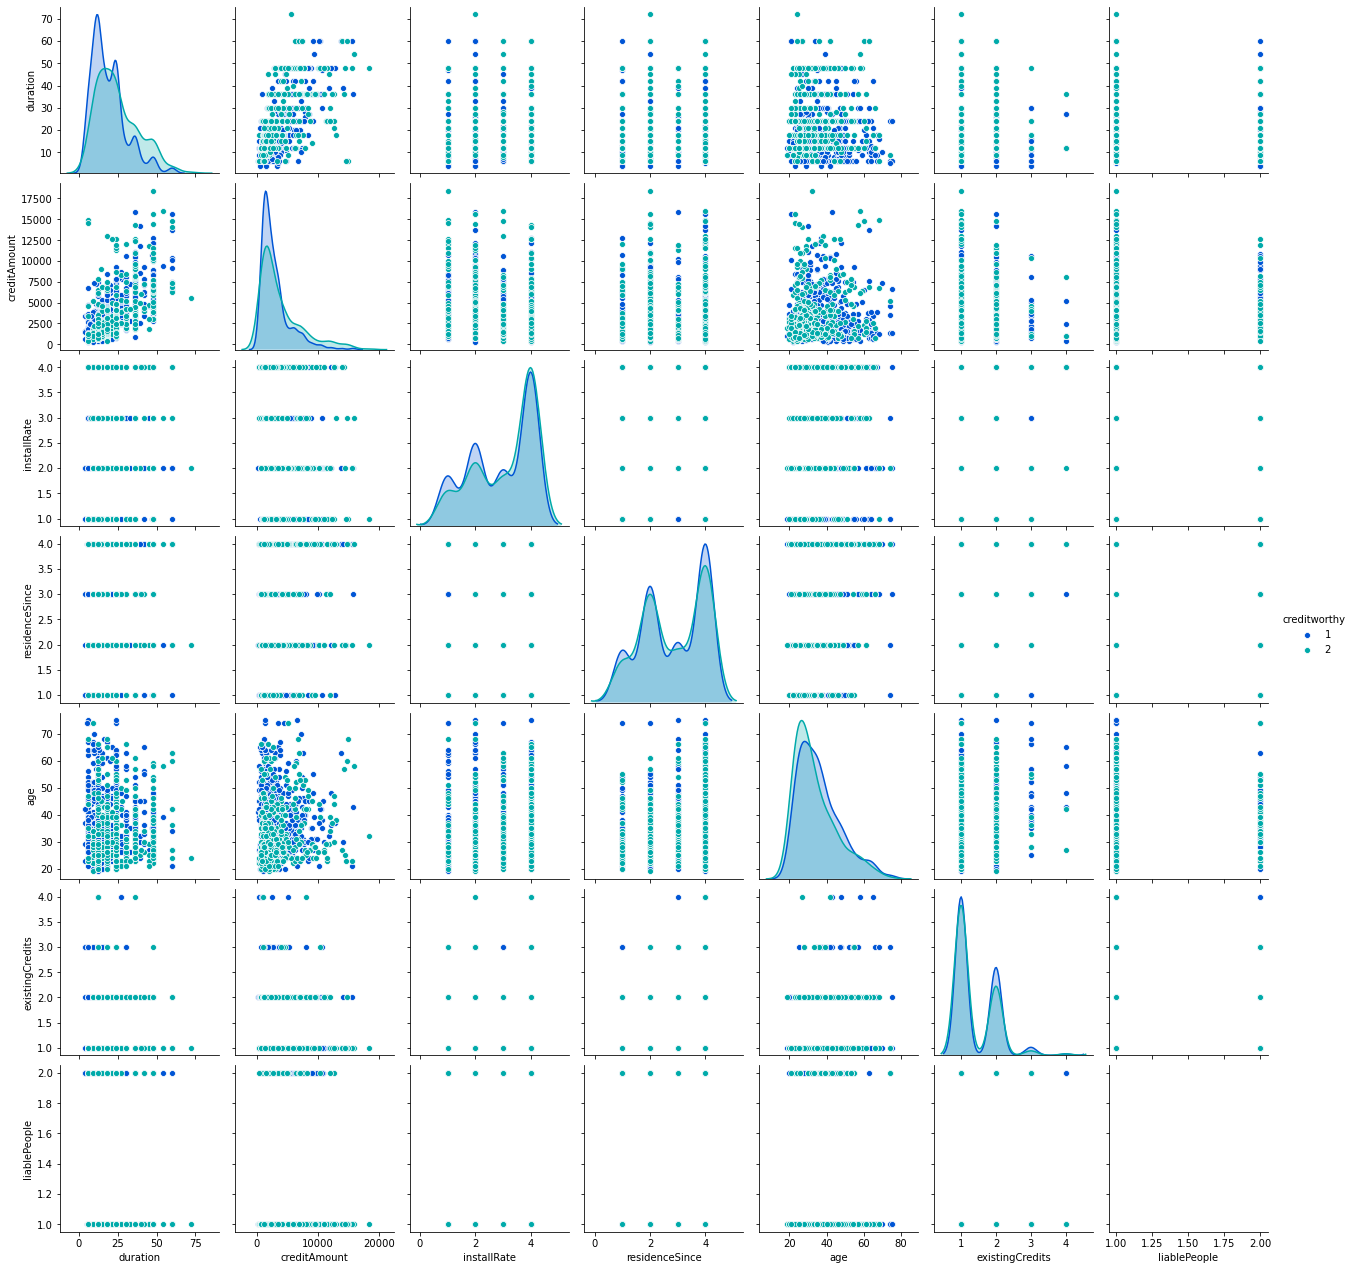

In [11]:
sns.pairplot(df, hue = 'creditworthy',palette="winter")

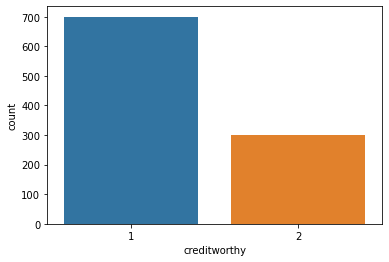

In [12]:
sns.countplot(df['creditworthy'])

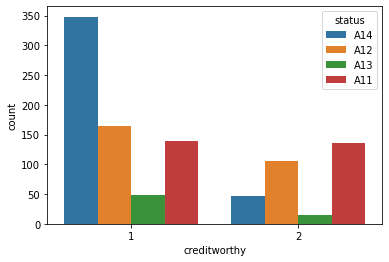

In [13]:
sns.countplot(df['creditworthy'], hue = 'status' ,  data=df)

In [14]:
# Replacing Categorical values to Numerical values of all the columns containing NaN values.
df['purpose'] = df['purpose'].map({'A40':0 , 'A41':1 ,'A42':2 ,'A43':3 ,'A44':4 ,'A45':5 ,'A46':6,'A47':7 ,'A48':8 ,'A49':9 ,'A410':10})
df['employmentSince'] = df['employmentSince'].map({'A71':1 ,'A72':2 ,'A73':3 ,'A74':4 ,'A75':5})
df['job'] = df['job'].map({'A171':1 ,'A172':2 ,'A173':3 ,'A174':4 ,'A175':5})
df['foreignWorker'] = df['foreignWorker'].map({'A201':1 ,'A202':2})

In [15]:
# One Hot Encoding of these columns
subtractCols = df[['purpose' , 'employmentSince' , 'job' , 'foreignWorker']]
dummies = df.drop(subtractCols, axis = 1, inplace = False)
dummieValues = pd.get_dummies(dummies)
df.drop(dummies, axis = 1, inplace= True)
df = pd.concat([df, dummieValues], axis = 1)
df.head()

,purpose,employmentSince,job,foreignWorker,duration,creditAmount,installRate,residenceSince,age,existingCredits,...,property_A123,property_A124,otherPlans_A141,otherPlans_A142,otherPlans_A143,housing_A151,housing_A152,housing_A153,telephone_A191,telephone_A192
0,NaN,NaN,3.0,NaN,36,2299,4,4,39,1,...,1,0,0,0,1,0,1,0,1,0
1,6.0,3.0,NaN,1.0,18,1239,4,4,61,1,...,0,1,0,0,1,0,0,1,1,0
2,0.0,4.0,NaN,NaN,24,947,4,3,38,1,...,0,1,1,0,0,0,0,1,1,0
3,3.0,3.0,3.0,1.0,15,1478,4,3,33,2,...,0,0,1,0,0,0,1,0,1,0
4,0.0,4.0,3.0,1.0,24,1525,4,3,34,1,...,1,0,0,0,1,0,1,0,0,1


In [16]:
# Now Imputing the missing values 
imputer = IterativeImputer(estimator=RandomForestClassifier())
imputed_df = imputer.fit(df)
df = pd.DataFrame(np.round(imputer.transform(df)) , columns = df.columns)
df.head()

,purpose,employmentSince,job,foreignWorker,duration,creditAmount,installRate,residenceSince,age,existingCredits,...,property_A123,property_A124,otherPlans_A141,otherPlans_A142,otherPlans_A143,housing_A151,housing_A152,housing_A153,telephone_A191,telephone_A192
0,3.0,5.0,3.0,1.0,36.0,2299.0,4.0,4.0,39.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,6.0,3.0,3.0,1.0,18.0,1239.0,4.0,4.0,61.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,4.0,3.0,1.0,24.0,947.0,4.0,3.0,38.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3.0,3.0,3.0,1.0,15.0,1478.0,4.0,3.0,33.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,4.0,3.0,1.0,24.0,1525.0,4.0,3.0,34.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [17]:
# After Imputation, reverting to original values
df['purpose'] = df['purpose'].map(dict(map(reversed, {'A40':0 , 'A41':1 ,'A42':2 ,'A43':3 ,'A44':4 ,'A45':5 ,'A46':6,'A47':7 ,'A48':8 ,'A49':9 ,'A410':10}.items())))
df['employmentSince'] = df['employmentSince'].map(dict(map(reversed, {'A71':1 ,'A72':2 ,'A73':3 ,'A74':4 ,'A75':5}.items())))
df['job'] = df['job'].map(dict(map(reversed,{'A171':1 ,'A172':2 ,'A173':3 ,'A174':4 ,'A175':5}.items())))
df['foreignWorker'] = df['foreignWorker'].map(dict(map(reversed,{'A201':1 ,'A202':2}.items())))

In [18]:
# One Hot Encoding of these four columns
dummies = df[['purpose' , 'employmentSince' , 'job' , 'foreignWorker']]
dummieValues = pd.get_dummies(dummies)
df.drop(dummies, axis = 1, inplace= True)
df = pd.concat([df, dummieValues], axis = 1)
df.head()

,duration,creditAmount,installRate,residenceSince,age,existingCredits,liablePeople,creditworthy,status_A11,status_A12,...,employmentSince_A72,employmentSince_A73,employmentSince_A74,employmentSince_A75,job_A171,job_A172,job_A173,job_A174,foreignWorker_A201,foreignWorker_A202
0,36.0,2299.0,4.0,4.0,39.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
1,18.0,1239.0,4.0,4.0,61.0,1.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,24.0,947.0,4.0,3.0,38.0,1.0,2.0,2.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0
3,15.0,1478.0,4.0,3.0,33.0,2.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,1,0,1,0
4,24.0,1525.0,4.0,3.0,34.0,1.0,2.0,1.0,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [19]:
# Validating null values, after Imputation, 
missing_values = df.isna()
missing_values.sum()

duration              0
creditAmount          0
installRate           0
residenceSince        0
age                   0
                     ..
job_A172              0
job_A173              0
job_A174              0
foreignWorker_A201    0
foreignWorker_A202    0
Length: 62, dtype: int64

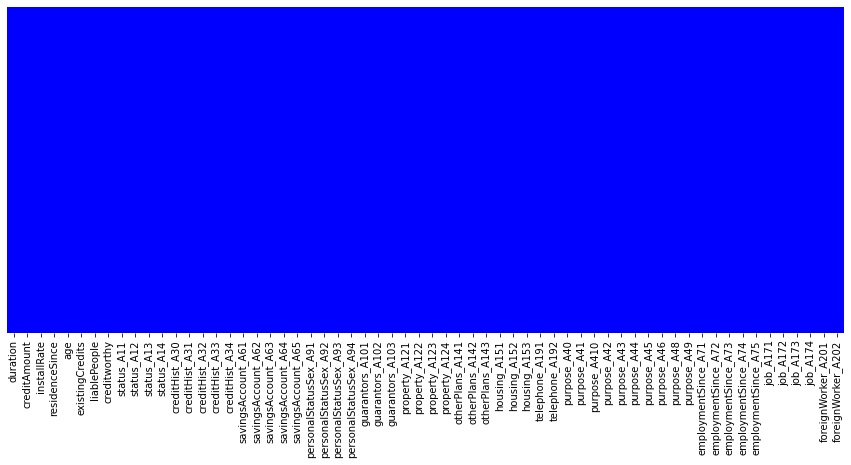

In [20]:
# Visual Validation
plt.figure(figsize = (15,6))
sns.heatmap(missing_values, yticklabels = False, cbar = False, cmap="winter")

In [21]:
# Scaling Data
dfNormalize = (df - df.min()) / (df.max() - df.min())
dfNormalize.head()

,duration,creditAmount,installRate,residenceSince,age,existingCredits,liablePeople,creditworthy,status_A11,status_A12,...,employmentSince_A72,employmentSince_A73,employmentSince_A74,employmentSince_A75,job_A171,job_A172,job_A173,job_A174,foreignWorker_A201,foreignWorker_A202
0,0.470588,0.112743,1.0,1.000000,0.357143,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.205882,0.054418,1.0,1.000000,0.750000,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.294118,0.038351,1.0,0.666667,0.339286,0.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.161765,0.067569,1.0,0.666667,0.250000,0.333333,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.294118,0.070155,1.0,0.666667,0.267857,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [22]:
# Dividing normalized Dataset/ Data Frame to Training and Testing Data.
x = dfNormalize.loc[:, dfNormalize.columns!="creditworthy"]
y = dfNormalize["creditworthy"]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42)


In [42]:
# Initializing Models
logRegression = LogisticRegression(C=1.0)

decisionTree = DecisionTreeClassifier(criterion="entropy", splitter="random")

randForest = RandomForestClassifier(n_estimators=50, criterion="entropy")


models = [logRegression,decisionTree,randForest]
modelNames = ['Logistic Classification:','Decision Trees:','Random Forests:']

In [43]:
# Training Models, Predicting them, Calculating metrics of each model

accuracies = []
precisions = []
recall = []
confusionMatrix = []
y_pred = []

for i in range(len(models)):
    models[i].fit(X_train,y_train)
    y_pred.append(models[i].predict(X_test))
    accuracies.append(accuracy_score(y_pred[i], y_test))
    precisions.append(precision_score(y_pred[i], y_test))
    recall.append(recall_score(y_pred[i], y_test))
    confusionMatrix.append(confusion_matrix(y_test, y_pred[i]))
    
    print(modelNames[i])
    print("Accuracy: "+str(accuracies[i])+'\nPrecision: '+str(precisions[i])+'\nRecall: '+str(recall[i])+'\n')



Logistic Classification:
Accuracy: 0.7366666666666667
Precision: 0.4791666666666667
Recall: 0.6133333333333333

Decision Trees:
Accuracy: 0.7033333333333334
Precision: 0.5104166666666666
Recall: 0.5384615384615384

Random Forests:
Accuracy: 0.72
Precision: 0.3229166666666667
Recall: 0.62



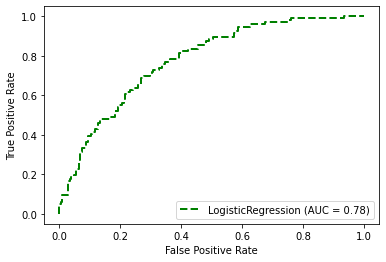

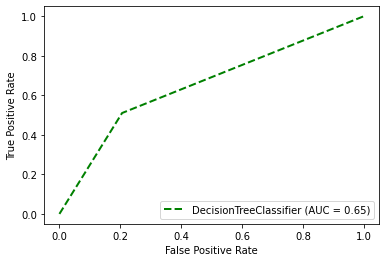

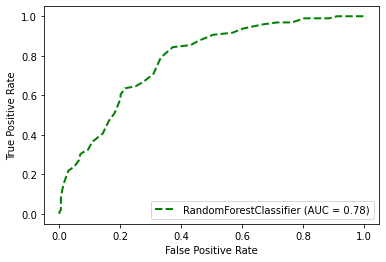

In [44]:
#Visualizing ROC Curves of all  Models

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle']='--'
plt.rcParams['axes.prop_cycle'] = cycler(color=['g'])
plt.figsize=(20,20)

for i in range(len(models)):
 plot_roc_curve(models[i], X_test, y_test)
 
 

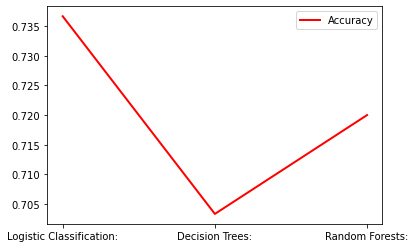

In [45]:
# Plotting Metrics of the Models 

plt.rcParams['lines.linestyle']='-'
plt.rcParams['axes.prop_cycle'] = cycler(color=['r'])
plt.figsize=(20,20)

plt.plot(modelNames, accuracies, label='Accuracy') 
plt.legend()
 

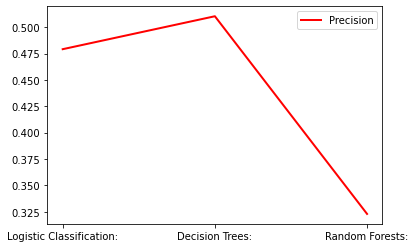

In [47]:
plt.plot(modelNames, precisions,label='Precision') 
plt.legend()

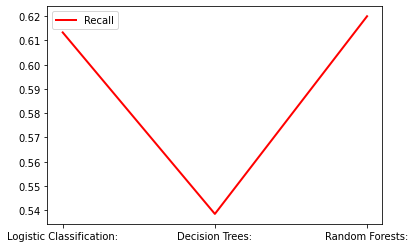

In [48]:
plt.plot(modelNames, recall,label='Recall') 
plt.legend()

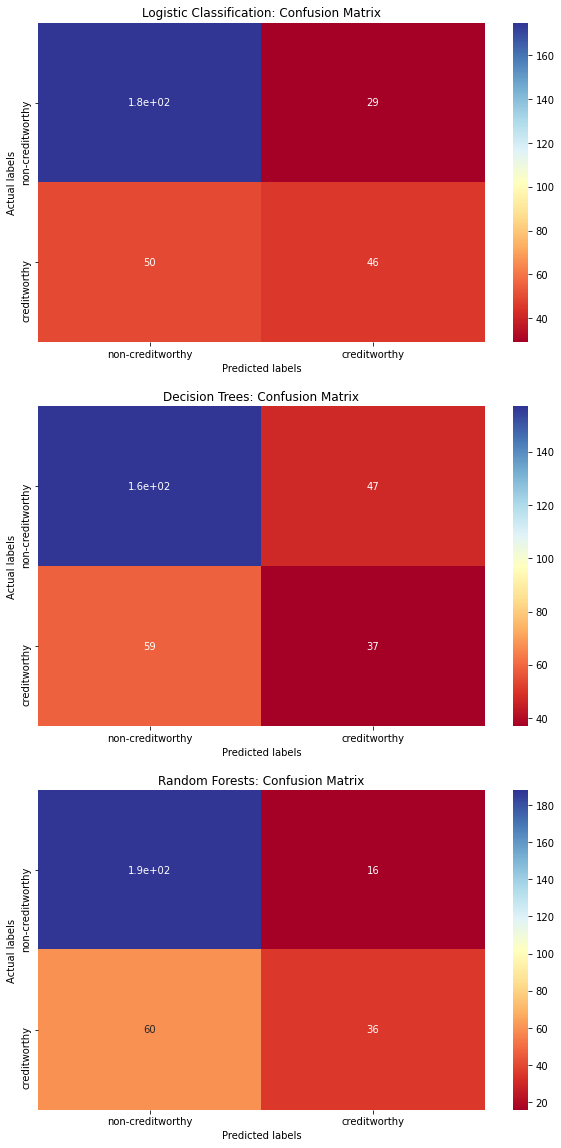

In [30]:
# Visualizing Confusion Matrices of Models
fig, ax = plt.subplots(3,1, figsize = (10,20))

for i in range(len(models)):
    sns.heatmap(confusionMatrix[i], annot=True, ax = ax[i], cmap="RdYlBu"); #annot=True to annotate cells
    # labels, title and ticks
    ax[i].set_xlabel('Predicted labels');
    ax[i].set_ylabel('Actual labels');
    ax[i].set_title(modelNmaes[i]+ ' Confusion Matrix');
    ax[i].xaxis.set_ticklabels(['non-creditworthy', 'creditworthy']) 
    ax[i].yaxis.set_ticklabels(['non-creditworthy', 'creditworthy']);

In [51]:
# Summarizing Evaluations
for i in range(len(models)):
    print(modelNames[i])
    print(classification_report(y_test, y_pred[i]))

Logistic Classification:
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       204
         1.0       0.61      0.48      0.54        96

    accuracy                           0.74       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300

Decision Trees:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       204
         1.0       0.54      0.51      0.52        96

    accuracy                           0.70       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.70      0.70       300

Random Forests:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81       204
         1.0       0.62      0.32      0.42        96

    accuracy                           0.72       300
   macro avg       0.68      0.61      0.62       300
weighted avg     

Text(0.5, 0, 'Feature Importances')

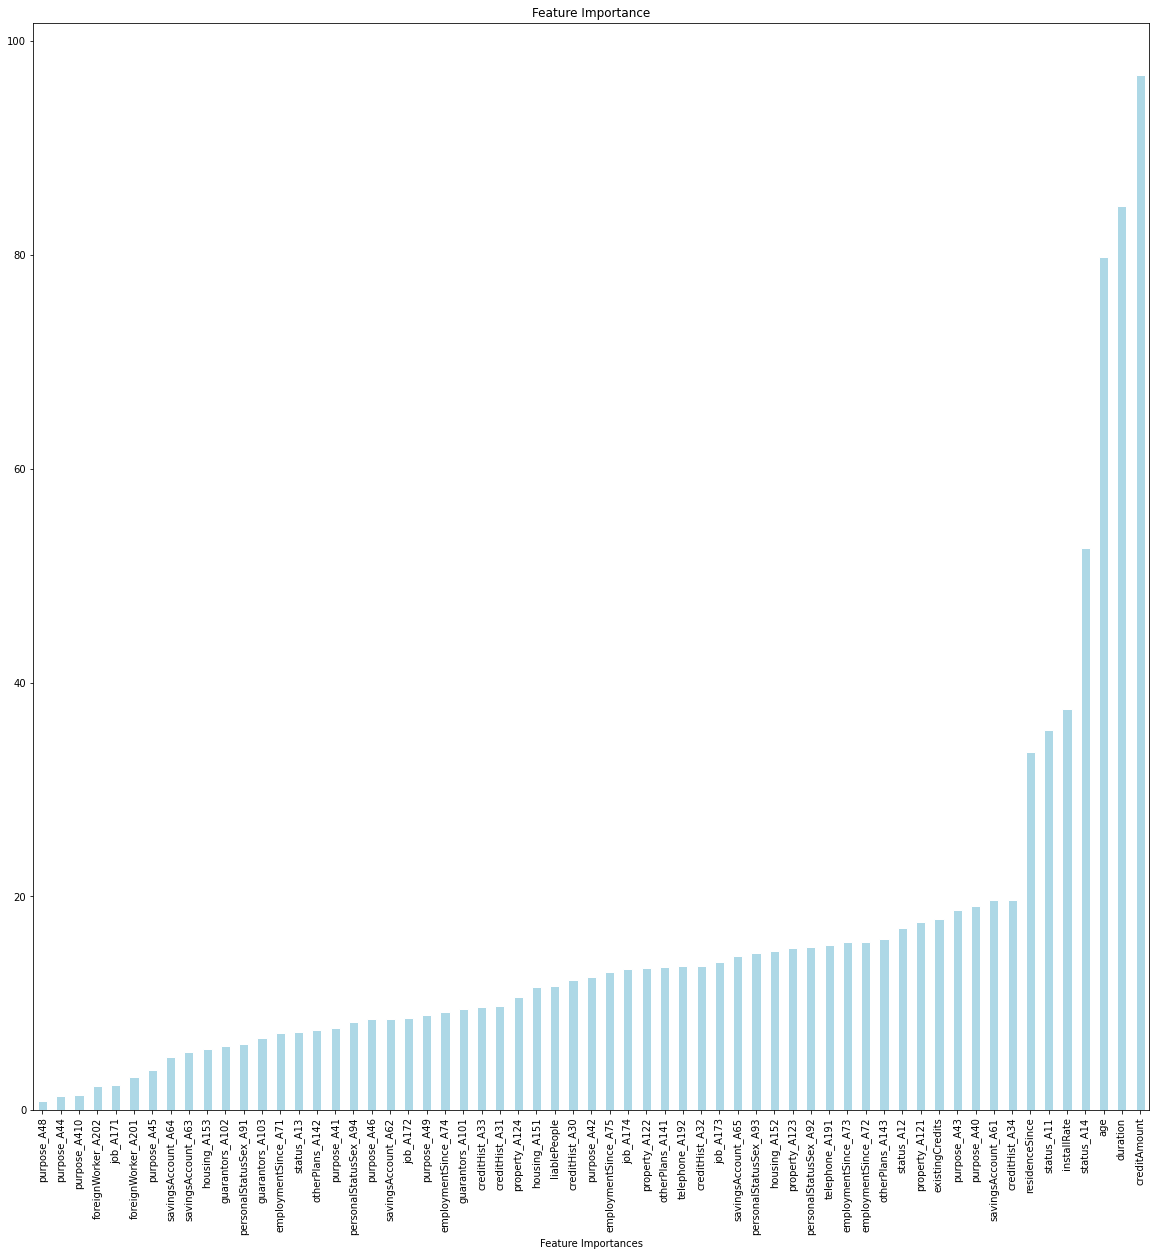

In [58]:
# Feature Importance
frf = RandomForestClassifier()
frf.fit(x, y)
fi = frf.feature_importances_

subtractCols = dfNormalize[['creditworthy']]
data = dfNormalize.drop(subtractCols, axis = 1, inplace = False)

features = np.array(data.columns)
df_fi = pd.DataFrame(fi*1000, features)
df_fi = df_fi.sort_values(0)
df_fi.plot(kind='bar', figsize = (20,20), color = 'lightblue', title ='Feature Importance', legend = False, edgecolor = 'white')
plt.xlabel('Feature Importances')

Logistic Classification:
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       204
         1.0       0.61      0.48      0.54        96

    accuracy                           0.74       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300

Decision Trees:
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       204
         1.0       0.54      0.51      0.52        96

    accuracy                           0.70       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.70      0.70       300

Random Forests:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81       204
         1.0       0.62      0.32      0.42        96

    accuracy                           0.72       300
   macro avg       0.68      0.61      0.62       300
weighted avg     

# THANK YOU
